Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:
− три входа (𝑥1, 𝑥2, 𝑥3);
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
− выход (𝑜1).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [0.5, 0.5, 0.5]
− 𝑏 = 0
Данные нейросети:
− два входа (𝑥1, 𝑥2);
− два нейрона в скрытых слоях (ℎ1, ℎ2);
− два выхода (𝑜1, 𝑜2).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [1, 0];
− 𝑏 = 1.

In [6]:
import numpy as np


def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid (total)
class NeuralNetwork_1:
    def __init__ (self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward (self, x):
        out_h1 = self.h1.feedforward (x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2,out_h3]))
        return out_o1
class NeuralNetwork_2:
    def __init__(self):
        weights = np.array([1, 0])  # Веса для каждого входа
        bias = 1  # Порог
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2
network = NeuralNetwork_1()
x = np.array([2, 3, 4])
print(network.feedforward(x)) 
network = NeuralNetwork_2()
x = np.array([2, 3]) 
output1, output2 = network.feedforward(x)
print("Output 1:", output1)
print("Output 2:", output2)

0.8151036049051821
Output 1: 0.8757270529783324
Output 2: 0.8757270529783324


Реализуйте классы нейронных сетей с использованием других функций активации.

In [17]:
import numpy as np


def act_func(x):
    if a==0:
        return 1/(1+np.exp(-x))
    if a==1:
        return np.tanh(x)
    if a==2:
        return max(0,x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward (self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return act_func(total)
class NeuralNetwork:
    def __init__ (self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward (self, x):
        out_h1 = self.h1.feedforward (x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2,out_h3]))
        return out_o1
    # 0 - sig, 1 - tanh, 2 - ReLU
a = 0
print('0 - sig, 1 - tanh, 2 - ReLU')
for a in range(3):
    network = NeuralNetwork()
    x = np.array([2, 3, 4])
    print(f'{a} : {network.feedforward(x)}') 

0 - sig, 1 - tanh, 2 - ReLU
0 : 0.8151036049051821
1 : 0.9050813365686774
2 : 6.75


Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f
7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-
regression/master/Salary_Data.csv

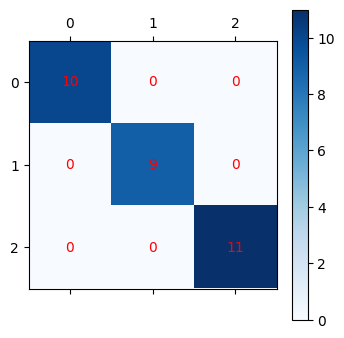

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Loss :  0.06417233963307187
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  490
Name of Output Layer Activation Function :  softmax


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_classifier.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = mlp_classifier.predict(X_test)

# Вывод матрицы ошибок
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(4, 4))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.xticks(range(conf_mat.shape[1]), range(conf_mat.shape[1]))
    plt.yticks(range(conf_mat.shape[0]), range(conf_mat.shape[0]))
    plt.colorbar()
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), color='red', ha='center', va='center')


# Вывод матрицы ошибок
plot_confusion_matrix(y_test, y_pred)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Loss : ", mlp_classifier.loss_)

print ("Number of Coefs : ", len(mlp_classifier.coefs_))

print ("Number of Intercepts : ", len(mlp_classifier.intercepts_))

print ("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)

print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
   Predicted Salary  Actual Salary
0      55265.204597        54445.0
1     126554.559194       121872.0
2      52335.805222        56642.0
3     116782.591474       116969.0
4      55265.204597        64445.0
5     117759.057933       112635.0
Mean Squared Error: 25283628.521064788


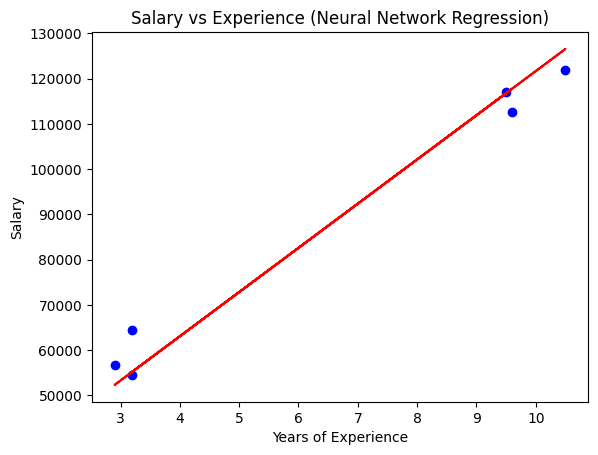

Loss :  16873681.689960096
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  30344
Name of Output Layer Activation Function :  identity


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Загрузка данных
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)
print(data.head())
# Разделение данных на признаки (опыт работы) и целевую переменную (заработная плата)
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Создание и обучение модели
mlp_regressor = MLPRegressor(random_state=123, max_iter=1000000)
mlp_regressor.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = mlp_regressor.predict(X_test)
df = pd.DataFrame({'Predicted Salary': y_pred[:10], 'Actual Salary': y_test[:10]})
print(df)
# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Визуализация результатов
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Salary vs Experience (Neural Network Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
print("Loss : ", mlp_regressor.loss_)

print ("Number of Coefs : ", len(mlp_regressor.coefs_))

print ("Number of Intercepts : ", len(mlp_regressor.intercepts_))

print ("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)